# **CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
# Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow.keras as keras
import tensorflow as tf

### Dataset exploration 

In [ ]:
# Fetching classes or can say categories
categories = [i for i in os.listdir(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset')]

In [ ]:
# Types
print(categories)

['no', 'yes']


In [ ]:
# Directories
no_images = [i for i in os.listdir(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset\no')]
yes_images = [i for i in os.listdir(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset\yes')]

In [ ]:
print("Number of yes images: ", len(yes_images))
print("Number of no images: ", len(no_images))

Number of yes images:  155
Number of no images:  98


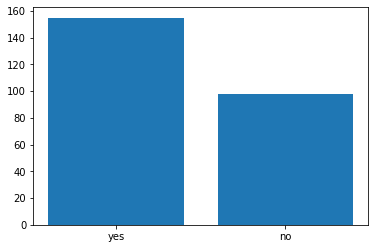

In [ ]:
# Plotting their numbers with count
names = ['yes', 'no']
values = [len(yes_images), len(no_images)]
plt.bar(names, values)
plt.savefig('distribution.png')

In [ ]:
# Using computer vision library to get the shape
img1 = cv2.imread(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset\no\1 no.jpeg')
print('NO image: ', img1.shape)
img2 = cv2.imread(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset\yes\Y1.jpg')
print("yes image: ", img2.shape)

NO image:  (630, 630, 3)
yes image:  (218, 180, 3)


Found 253 files belonging to 2 classes.


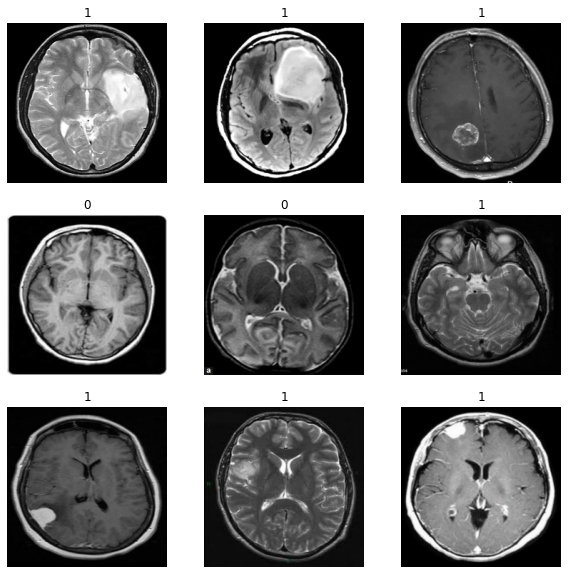

In [ ]:
# Some images on which model is trained
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', image_size =(224, 224))

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')
plt.savefig('original_data.png')

In [ ]:
# From the above observation it is found that:-
# The dataset contains a total of 253 images out of which 
# 155 images belong to class yes and
# 98 images belongs to class no.
# It is a very uneven distribution of data in this dataset.
# It is also found that the shape of images in the dataset are not standardized.
# Each image in this dataset is of different dimension.
# Images in this dataset are colored images of 3 dimesions.

#In the above exampler plot of images in our dataset {0: 'no', 1: 'yes'}

### Image Preprocessing

There are many data preprocessing techniques which can be used to increase the quality of the data.Also data preprocessing also ready the images for the proper input in the model. Some preprocessing techniques are described here.

In [ ]:
# Loading data with scaling 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255.0)
train = gen.flow_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', target_size =(150, 150))
imgs, labels = next(train)

Found 253 images belonging to 2 classes.


In [ ]:
#Effect of rescaling
#Rescaling normalizez the feature importance so that our model don't get bias

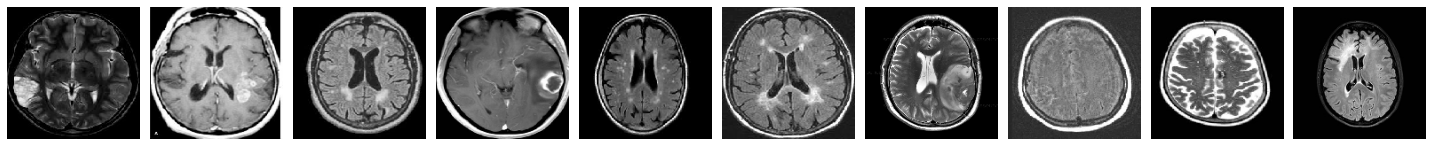

In [ ]:
# Plotting images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('rescale.png')
    plt.show()
plot_images(imgs)

Gaussian blur increases the sharpness of the images and help in edge detection

In [ ]:
# Guassian Blur
def guassian_blur(img):
    image = cv2.GaussianBlur(img, (5,5), 0)
    return np.asarray(image)

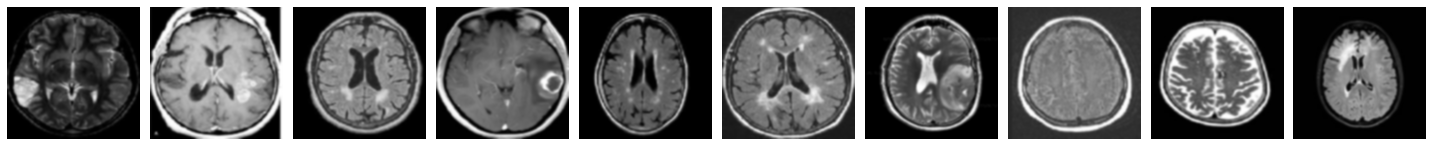

In [ ]:
# Compare Images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = guassian_blur(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('gaussian_blur.png')
    plt.show()
plot_images(imgs)

Contrast helps in distinguishing the background and the object of interest in the image

In [ ]:
# Contrast
def contrast(img):
    image = img * 2
    return np.asarray(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

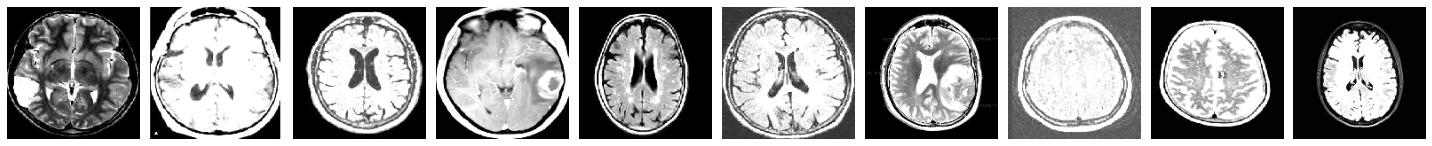

In [ ]:
# Compare Images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = contrast(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('contrast.png')
    plt.show()
plot_images(imgs)

Brightness helps in exploring the image

In [ ]:
# Brightness
def brightness(img):
    image = img + 0.2
    return np.asarray(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

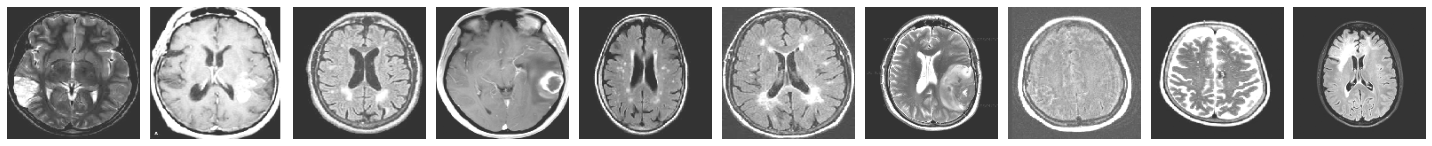

In [ ]:
# Compare Images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = brightness(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('brightness.png')
    plt.show()
plot_images(imgs)

Data augmentation increases the number of images for training purpose, also it helps creating the conditions that can occur in real time

### Data Augmentation

In [ ]:
# Data Augmentation
data_augmentation  = keras.Sequential(
[
    keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

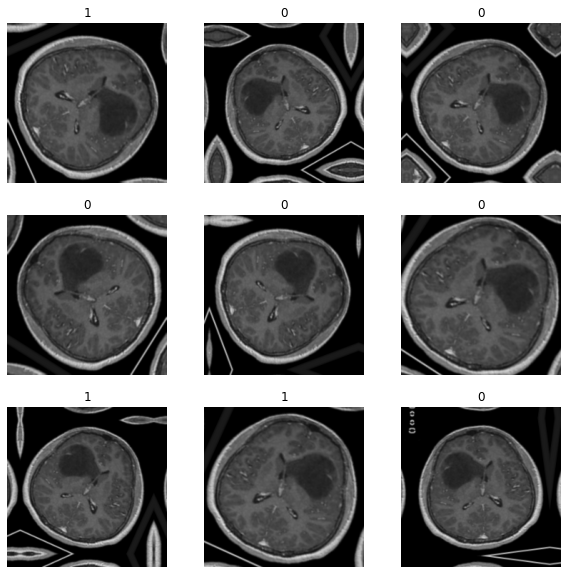

In [ ]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')
plt.savefig('augmentation.png')

In [ ]:
def preprocessing_function(imgs):
    image = cv2.GaussianBlur(imgs, (5,5), 0)
    image = image * 2
    image = image + 0.2
    return np.asarray(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

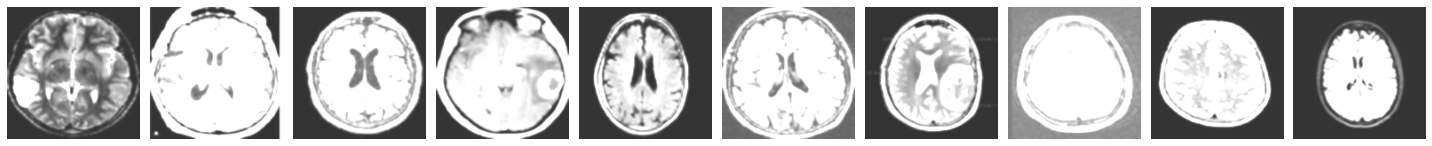

In [ ]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = preprocessing_function(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('completepreprocessing.png')
    plt.show()
plot_images(imgs)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255.0, preprocessing_function = preprocessing_function, 
                         validation_split= 0.3, rotation_range = 75
                        )
train = gen.flow_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', target_size =(224, 224), subset = 'training')
validation = gen.flow_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', target_size =(224, 224), subset = 'validation')

Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


# Model

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(416, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Conv2D(208, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(train, validation_data=validation, epochs = 10)

Epoch 1/10
6/6 [==============================] - 334s 51s/step - loss: 6.4263 - accuracy: 0.4719 - val_loss: 0.6797 - val_accuracy: 0.6133
Epoch 2/10
6/6 [==============================] - 265s 40s/step - loss: 0.6913 - accuracy: 0.6124 - val_loss: 0.6549 - val_accuracy: 0.6133
Epoch 3/10
6/6 [==============================] - 252s 40s/step - loss: 0.6860 - accuracy: 0.6404 - val_loss: 0.6572 - val_accuracy: 0.6933
Epoch 4/10
6/6 [==============================] - 232s 36s/step - loss: 0.5770 - accuracy: 0.7640 - val_loss: 0.6327 - val_accuracy: 0.7333
Epoch 5/10
6/6 [==============================] - 231s 36s/step - loss: 0.5408 - accuracy: 0.7191 - val_loss: 0.5798 - val_accuracy: 0.6933
Epoch 6/10
6/6 [==============================] - 227s 36s/step - loss: 0.5030 - accuracy: 0.7640 - val_loss: 0.5832 - val_accuracy: 0.7067
Epoch 7/10
6/6 [==============================] - 230s 36s/step - loss: 0.5412 - accuracy: 0.7697 - val_loss: 0.6669 - val_accuracy: 0.6933
Epoch 8/10
6/6 [====

In [ ]:
# Summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 416)     11648     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 416)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 208)       778960    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 208)       0         
_________________________________________________________________
flatten (Flatten)            (None, 119808)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              122684416 
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [ ]:
# Weights
model.save('model.h5')

### Plot

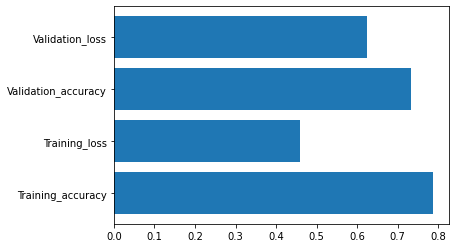

In [ ]:
names = ['Training_accuracy', 'Training_loss', 'Validation_accuracy', 'Validation_loss']
values = [history.history['accuracy'][-1], history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['val_loss'][-1]]
plt.barh(names, values)
plt.savefig('final_values.png')

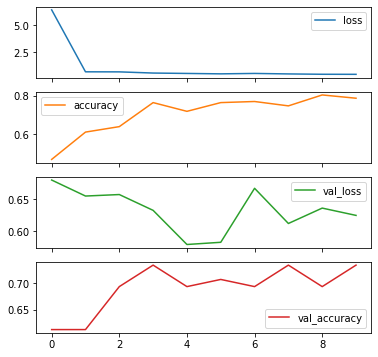

In [ ]:
# Plot of accuracy & loss 
pd.DataFrame(history.history).plot(subplots = True, figsize=(6,6))
plt.savefig('training.png')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255.0, preprocessing_function = preprocessing_function
                        )
test = gen.flow_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', target_size =(224, 224))

Found 253 images belonging to 2 classes.


### Evaluation

In [ ]:
model.evaluate(test)

8/8 [==============================] - 96s 9s/step - loss: 0.5181 - accuracy: 0.7747


[0.5181099772453308, 0.7747035622596741]

In [ ]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
target_names = test.class_indices.keys()
print(target_names)

dict_keys(['no', 'yes'])


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix")
print(confusion_matrix(test.classes, y_pred))

Confusion Matrix
[[ 29  69]
 [ 44 111]]


In [ ]:
print('Classification Report')
print(classification_report(test.classes, y_pred, target_names = target_names))

Classification Report
              precision    recall  f1-score   support

          no       0.40      0.30      0.34        98
         yes       0.62      0.72      0.66       155

    accuracy                           0.55       253
   macro avg       0.51      0.51      0.50       253
weighted avg       0.53      0.55      0.54       253



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
print(roc_curve(test.classes, y_pred))

(array([0.        , 0.70408163, 1.        ]), array([0.        , 0.71612903, 1.        ]), array([2, 1, 0], dtype=int64))


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(test.classes, y_pred))

0.5060236998025016


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(test.classes, y_pred)

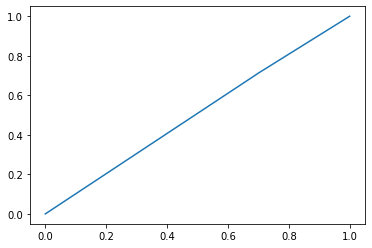

In [ ]:
import matplotlib.pyplot as plt
plt.plot(false_positive_rate, true_positive_rate)
plt.savefig('roc.png')

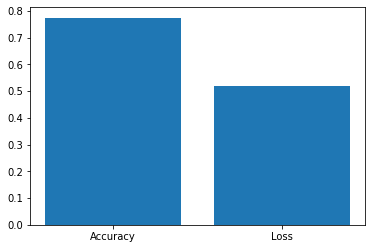

In [ ]:
names = ['Accuracy', 'Loss']
plt.bar(names, [0.7747, 0.5181])
plt.savefig('testing.png')

### Time for pretrained model

In [ ]:
import tensorflow as tf 
import tensorflow.keras as keras
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(preprocessing_function = preprocess_input, 
                         validation_split= 0.3)
train = gen.flow_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', target_size =(224, 224), subset = 'training')
validation = gen.flow_from_directory(r'C:\Users\user\Desktop\xrays\archive\brain_tumor_dataset', target_size =(224, 224), subset = 'validation')


baseModel = InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(3,3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False
    
opt = Adam(learning_rate=1e-4, decay=1e-4 / 10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
early_stop = keras.callbacks.EarlyStopping(patience=2)

history = model.fit(train, validation_data = validation, epochs = 10, callbacks=[early_stop])

Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.
Epoch 1/10
6/6 [==============================] - 242s 20s/step - loss: 1.2481 - accuracy: 0.4551 - val_loss: 0.7182 - val_accuracy: 0.5333
Epoch 2/10
6/6 [==============================] - 74s 13s/step - loss: 0.9882 - accuracy: 0.4944 - val_loss: 0.6401 - val_accuracy: 0.5600
Epoch 3/10
6/6 [==============================] - 77s 14s/step - loss: 0.6559 - accuracy: 0.6292 - val_loss: 0.6182 - val_accuracy: 0.6533
Epoch 4/10
6/6 [==============================] - 74s 14s/step - loss: 0.5810 - accuracy: 0.6742 - val_loss: 0.5962 - val_accuracy: 0.6667
Epoch 5/10
6/6 [==============================] - 75s 13s/step - loss: 0.5186 - accuracy: 0.7416 - val_loss: 0.5817 - val_accuracy: 0.6667
Epoch 6/10
6/6 [==============================] - 75s 14s/step - loss: 0.4934 - accuracy: 0.7528 - val_loss: 0.5838 - val_accuracy: 0.6533
Epoch 7/10
6/6 [==============================] - 74s 13s/step - loss: 0.4731 - accu

In [ ]:
model.save('inception_resnet_v2.h5')

In [ ]:
# Summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_609 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_609 (BatchN (None, 111, 111, 32) 96          conv2d_609[0][0]                 
__________________________________________________________________________________________________
activation_609 (Activation)     (None, 111, 111, 32) 0           batch_normalization_609[0][0]    
____________________________________________________________________________________________

__________________________________________________________________________________________________
block17_5_conv (Conv2D)         (None, 12, 12, 1088) 418880      block17_5_mixed[0][0]            
__________________________________________________________________________________________________
block17_5 (Lambda)              (None, 12, 12, 1088) 0           block17_4_ac[0][0]               
                                                                 block17_5_conv[0][0]             
__________________________________________________________________________________________________
block17_5_ac (Activation)       (None, 12, 12, 1088) 0           block17_5[0][0]                  
__________________________________________________________________________________________________
conv2d_706 (Conv2D)             (None, 12, 12, 128)  139264      block17_5_ac[0][0]               
__________________________________________________________________________________________________
batch_norm

batch_normalization_778 (BatchN (None, 5, 5, 224)    672         conv2d_778[0][0]                 
__________________________________________________________________________________________________
activation_778 (Activation)     (None, 5, 5, 224)    0           batch_normalization_778[0][0]    
__________________________________________________________________________________________________
conv2d_776 (Conv2D)             (None, 5, 5, 192)    399360      block8_1_ac[0][0]                
__________________________________________________________________________________________________
conv2d_779 (Conv2D)             (None, 5, 5, 256)    172032      activation_778[0][0]             
__________________________________________________________________________________________________
batch_normalization_776 (BatchN (None, 5, 5, 192)    576         conv2d_776[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [ ]:
# Evaluation
model.evaluate(test)

8/8 [==============================] - 48s 6s/step - loss: 0.4882 - accuracy: 0.7510


[0.48818284273147583, 0.7509881258010864]

In [ ]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)

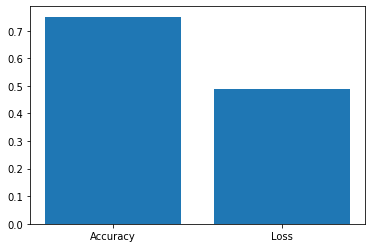

In [ ]:
names = ['Accuracy', 'Loss']
plt.bar(names, [0.75098, 0.4881])
plt.savefig('testinginception.png')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix")
print(confusion_matrix(test.classes, y_pred))

Confusion Matrix
[[32 66]
 [57 98]]


In [ ]:
target_names = test.class_indices.keys()

print('Classification Report')
print(classification_report(test.classes, y_pred, target_names = target_names))

Classification Report
              precision    recall  f1-score   support

          no       0.36      0.33      0.34        98
         yes       0.60      0.63      0.61       155

    accuracy                           0.51       253
   macro avg       0.48      0.48      0.48       253
weighted avg       0.51      0.51      0.51       253



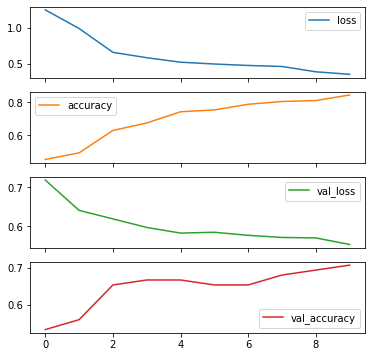

In [ ]:
pd.DataFrame(history.history).plot(subplots = True, figsize=(6,6))
plt.savefig('traininginception.png')

# Completed